In [1]:
import pandas as pd
from pandas import DataFrame 
import datetime
import pandas.io.data


C:\Users\Afizullah\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [11]:
#fetching data for TCS from yahoo 
TCSdata = pd.io.data.get_data_yahoo('TCS.NS',
                                 start=datetime.datetime(2015,1,1),
                                 end=datetime.datetime(2015,12,1))

In [13]:
#printing first 5 rows. 
print(TCSdata.head())

              Open     High      Low    Close   Volume  Adj Close
Date                                                             
2015-01-01  2567.0  2567.00  2541.00  2545.55   183400   2506.201
2015-01-02  2551.0  2590.95  2550.60  2579.45   462800   2539.577
2015-01-05  2581.0  2599.90  2524.65  2540.25   877100   2500.983
2015-01-06  2529.1  2529.10  2440.00  2446.60  1211800   2408.781
2015-01-07  2470.0  2479.15  2407.45  2417.70  1318100   2380.327


In [14]:
#writing entire data to csv file. 
TCSdata.to_csv('tcsdata.csv')

In [16]:
#reading data back from csv file. 
data = pd.read_csv('tcsdata.csv',index_col='Date', parse_dates=True )
#print(data.head())

#selecting only Open column. 
data_open = data['Open']
print(data_open.head())

Date
2015-01-01    2567.0
2015-01-02    2551.0
2015-01-05    2581.0
2015-01-06    2529.1
2015-01-07    2470.0
Name: Open, dtype: float64


In [17]:
#selecting multiple columns from data 
columns = ['Close', 'High']
dch=data[columns]
print(dch.head())

              Close     High
Date                        
2015-01-01  2545.55  2567.00
2015-01-02  2579.45  2590.95
2015-01-05  2540.25  2599.90
2015-01-06  2446.60  2529.10
2015-01-07  2417.70  2479.15


In [20]:
#renaming columns
dch.rename(columns={'Close':'CLOSE'}, inplace=True)
print(dch.head())

              CLOSE     High
Date                        
2015-01-01  2545.55  2567.00
2015-01-02  2579.45  2590.95
2015-01-05  2540.25  2599.90
2015-01-06  2446.60  2529.10
2015-01-07  2417.70  2479.15


C:\Users\Afizullah\Anaconda3\lib\site-packages\pandas\core\frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [21]:
dc1400 = dch[dch['CLOSE']>1400]
print(dc1400)

              CLOSE     High
Date                        
2015-01-01  2545.55  2567.00
2015-01-02  2579.45  2590.95
2015-01-05  2540.25  2599.90
2015-01-06  2446.60  2529.10
2015-01-07  2417.70  2479.15
2015-01-08  2443.80  2449.00
2015-01-09  2512.30  2519.90
2015-01-12  2509.70  2528.00
2015-01-13  2497.90  2530.40
2015-01-14  2521.95  2531.80
2015-01-15  2539.10  2581.75
2015-01-16  2532.15  2545.00
2015-01-19  2511.00  2551.00
2015-01-20  2500.45  2530.00
2015-01-21  2513.80  2522.00
2015-01-22  2513.55  2521.25
2015-01-23  2503.60  2532.05
2015-01-26  2503.60  2503.60
2015-01-27  2502.05  2515.00
2015-01-28  2539.60  2544.90
2015-01-29  2544.65  2568.70
2015-01-30  2482.05  2575.00
2015-02-02  2514.20  2521.45
2015-02-03  2558.25  2565.00
2015-02-04  2514.30  2571.70
2015-02-05  2552.40  2591.70
2015-02-06  2575.75  2594.80
2015-02-09  2512.90  2569.10
2015-02-10  2441.15  2526.25
2015-02-11  2459.90  2487.25
...             ...      ...
2015-10-21  2530.00  2542.00
2015-10-22  25

In [26]:
#lets add a new column for difference between High and LOW
data['H-L'] = data['High'] - data['Low']

#lets add another column for difference between previous close
data['Difference'] = data['Close'].diff()

print(data.head())

              Open     High      Low    Close   Volume  Adj Close    H-L  \
Date                                                                       
2015-01-01  2567.0  2567.00  2541.00  2545.55   183400   2506.201  26.00   
2015-01-02  2551.0  2590.95  2550.60  2579.45   462800   2539.577  40.35   
2015-01-05  2581.0  2599.90  2524.65  2540.25   877100   2500.983  75.25   
2015-01-06  2529.1  2529.10  2440.00  2446.60  1211800   2408.781  89.10   
2015-01-07  2470.0  2479.15  2407.45  2417.70  1318100   2380.327  71.70   

            Difference  
Date                    
2015-01-01         NaN  
2015-01-02       33.90  
2015-01-05      -39.20  
2015-01-06      -93.65  
2015-01-07      -28.90  


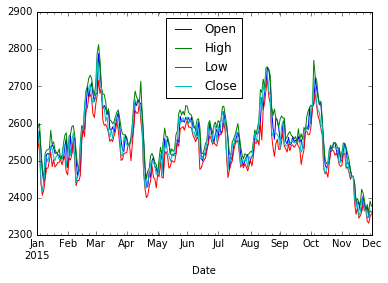

In [33]:
#lets plot using Matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

columns =['Open','High', 'Low', 'Close']

data[columns].plot()
plt.show()



         Date    Open     High      Low    Close   Volume  Adj Close
0  2015-01-01  2567.0  2567.00  2541.00  2545.55   183400   2506.201
1  2015-01-02  2551.0  2590.95  2550.60  2579.45   462800   2539.577
2  2015-01-05  2581.0  2599.90  2524.65  2540.25   877100   2500.983
3  2015-01-06  2529.1  2529.10  2440.00  2446.60  1211800   2408.781
4  2015-01-07  2470.0  2479.15  2407.45  2417.70  1318100   2380.327


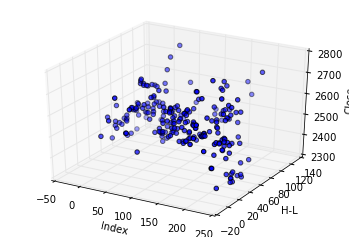

In [39]:
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv('tcsdata.csv', parse_dates=True)
print(data.head())
data['H-L'] = data['High'] - data['Low']
data['100ma'] = pd.rolling_mean(data['Close'],100) #added 100 mean column. 

#lets plot the 3d figure 
threeD = plt.figure().gca(projection='3d')
threeD.scatter(data.index, data['H-L'], data['Close'])
threeD.set_xlabel('Index')
threeD.set_ylabel('H-L')
threeD.set_zlabel('Close')
plt.show()

# standard deviation example in pandas 

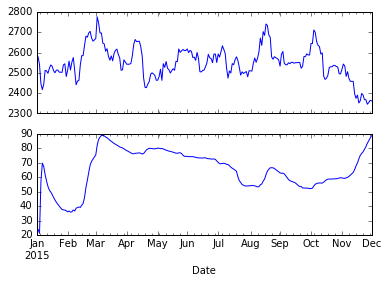

In [41]:
#read tcsdata file again 
data = pd.read_csv('tcsdata.csv', index_col='Date', parse_dates=True)

data['H-L'] = data['High'] - data['Low']
data['100ma'] = pd.rolling_mean(data['Close'], 100, min_periods=1)
data['Difference'] = data['Close'].diff()
data['STD'] = pd.rolling_std(data['Close'], 100, min_periods=1)

ax1 = plt.subplot(2,1,1)
data['Close'].plot()
ax2 = plt.subplot(2,1,2, sharex=ax1)
data['STD'].plot()

plt.show()






# Statistics information of Data using pandas

In [42]:
#describe data 
data.describe()

,Open,High,Low,Close,Volume,Adj Close,H-L,100ma,Difference,STD
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,238.000000,238.000000
mean,2555.157113,2575.604393,2528.025314,2549.999791,1131039.330544,2530.587251,47.579079,2555.106773,-0.771639,65.064022
std,77.178900,80.758207,74.021692,78.392262,667958.175772,76.836101,24.394263,20.563146,32.580167,13.831269
min,2348.000000,2359.450000,2332.500000,2345.550000,0.000000,2345.550000,0.000000,2495.558333,-114.850000,21.267894
25%,2511.325000,2527.125000,2485.000000,2506.275000,753300.000000,2481.177000,31.875000,2551.343000,-17.425000,55.728872
50%,2553.300000,2570.100000,2527.100000,2547.450000,1029200.000000,2533.800000,43.950000,2561.980000,0.000000,66.107458
75%,2598.475000,2621.850000,2570.475000,2593.400000,1383500.000000,2575.389000,60.350000,2568.705143,16.175000,76.577089
max,2788.000000,2812.100000,2721.900000,2776.000000,4834300.000000,2738.558000,128.000000,2577.173000,106.600000,88.884146


In [43]:
#corelation 
data.corr()

,Open,High,Low,Close,Volume,Adj Close,H-L,100ma,Difference,STD
Open,1.000000,0.964488,0.953395,0.923008,0.045999,0.904340,0.300005,0.234135,-0.125602,0.043367
High,0.964488,1.000000,0.954022,0.965896,0.091941,0.943595,0.415667,0.204492,0.051361,0.031619
Low,0.953395,0.954022,1.000000,0.974070,-0.090699,0.960182,0.123940,0.239655,0.098912,0.028190
Close,0.923008,0.965896,0.974070,1.000000,-0.034921,0.981112,0.241931,0.202289,0.236638,0.023554
Volume,0.045999,0.091941,-0.090699,-0.034921,1.000000,-0.058753,0.579590,-0.072610,-0.187377,-0.045069
Adj Close,0.904340,0.943595,0.960182,0.981112,-0.058753,1.000000,0.210243,0.284482,0.231700,-0.003660
H-L,0.300005,0.415667,0.123940,0.241931,0.579590,0.210243,1.000000,-0.050227,-0.130304,0.019170
100ma,0.234135,0.204492,0.239655,0.202289,-0.072610,0.284482,-0.050227,1.000000,-0.112297,0.524775
Difference,-0.125602,0.051361,0.098912,0.236638,-0.187377,0.231700,-0.130304,-0.112297,1.000000,-0.066904
STD,0.043367,0.031619,0.028190,0.023554,-0.045069,-0.003660,0.019170,0.524775,-0.066904,1.000000


In [44]:
#if you want to get the information of only particular columns 
columns = ['Open','Close']
data[columns].corr()

,Open,Close
Open,1.000000,0.923008
Close,0.923008,1.000000


#Application of Correlation 

In [61]:
#Fetch data for TCS, WIPRO, L&T, JPAssociates , SBI
#please remember pandas.io.data is required to fetch the data from yahoo site 

startdate = datetime.datetime(2010,1,1)
enddate = datetime.datetime(2015,12,1)
TCS = pd.io.data.get_data_yahoo('TCS.NS',start = startdate, end=enddate)
WIPRO = pd.io.data.get_data_yahoo('WIPRO.NS',start = startdate, end=enddate)
LT = pd.io.data.get_data_yahoo('LT.NS',start = startdate, end=enddate)
JPASS = pd.io.data.get_data_yahoo('JPASSOCIA.NS',start = startdate, end=enddate)
SBI = pd.io.data.get_data_yahoo('SBIN.NS',start = startdate, end=enddate)

print(TCS.head())


              Open    High     Low   Close   Volume  Adj Close
Date                                                          
2010-01-01  748.80  748.80  748.80  748.80        0    681.777
2010-01-04  754.80  758.90  749.05  752.25   981800    684.919
2010-01-05  755.00  759.55  746.55  748.70  1007200    681.686
2010-01-06  751.85  752.20  733.00  737.00  1674500    671.034
2010-01-07  735.50  739.40  711.00  711.85  3237400    648.135


In [63]:
#write TCS data to file. 
TCS.to_csv('TCS2015.csv')

# Generally people want correlation table on Ajd close .. so lets create new data frame with all the Adj Close values. 

In [64]:
#first delete all the columns except Adj Close
TCS1 = TCS
del TCS['Open']
del TCS['High']
del TCS['Low']
del TCS['Close']
del TCS['Volume']
corrComp = TCS
corrComp.head()

,Adj Close
Date,
2010-01-01,681.777
2010-01-04,684.919
2010-01-05,681.686
2010-01-06,671.034
2010-01-07,648.135


### lets rename Adj Close to company name i.e. TCS and add other companies data too

            TCS     WIPRO        LT     JPASS       SBI
TCS    1.000000  0.902872  0.727051 -0.855365  0.809153
WIPRO  0.902872  1.000000  0.778724 -0.689413  0.756599
LT     0.727051  0.778724  1.000000 -0.447153  0.828794
JPASS -0.855365 -0.689413 -0.447153  1.000000 -0.634544
SBI    0.809153  0.756599  0.828794 -0.634544  1.000000


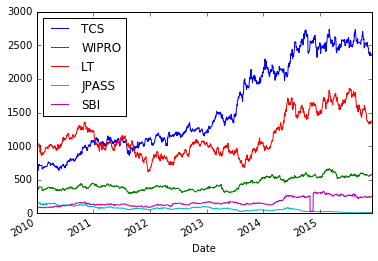

In [67]:
corrComp.rename(columns={'Adj Close': 'TCS'}, inplace=True)
corrComp['WIPRO'] = WIPRO['Adj Close']
corrComp['LT'] = LT['Adj Close']
corrComp['JPASS'] = JPASS['Adj Close']
corrComp['SBI'] = SBI['Adj Close']

corrComp.plot()
print(corrComp.corr())

In [52]:
print(corrComp.corr())

              C     WIPRO        LT     JPASS       SBI
C      1.000000  0.902872  0.727051 -0.855365  0.809153
WIPRO  0.902872  1.000000  0.778724 -0.689413  0.756599
LT     0.727051  0.778724  1.000000 -0.447153  0.828794
JPASS -0.855365 -0.689413 -0.447153  1.000000 -0.634544
SBI    0.809153  0.756599  0.828794 -0.634544  1.000000


In [59]:
corrData = corrComp.corr()
corrData.to_csv('corrdata.csv')